Valor final de la mejor solución: 1.2368516478130955
Mejor solución encontrada: [ 0.39071011  0.15358975 -0.01502621]


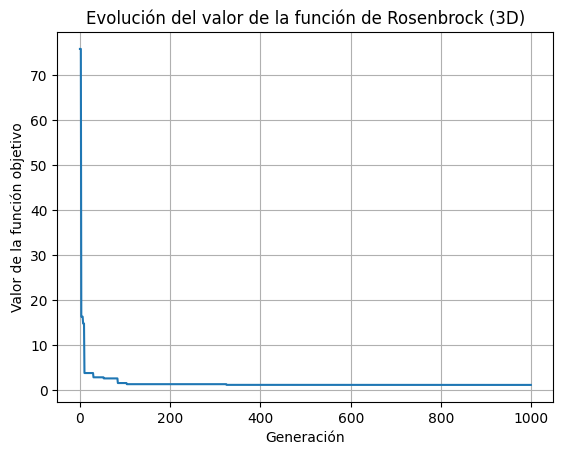

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generación de una población inicial
def pob_inicial(N, d, LB=None, UB=None):
    Pob0 = np.random.rand(N, d)
    if LB is not None:
        Pob0 = Pob0 * (UB - LB) + LB
    return Pob0

# Función de Rosenbrock en 3 dimensiones
def rosenbrock_fun(x):
    val = 0
    for i in range(len(x) - 1):
        val += 100 * (x[i + 1] - x[i]**2)**2 + (1 - x[i])**2
    return val

# Mutación de individuos
def mutacion(Pob, indices_mutantes, LB, UB):
    Pob = Pob.copy()
    n_row, n_col = Pob.shape
    for i in indices_mutantes:
        coord_mutacion = np.random.randint(low=0, high=n_col, size=1)
        Pob[i, coord_mutacion] = np.random.rand() * (UB[coord_mutacion] - LB[coord_mutacion]) + LB[coord_mutacion]
    return Pob[indices_mutantes]

# Cruzamiento de individuos
def cruzamiento(Pob):
    Pob = Pob.copy()
    n_row, n_col = Pob.shape
    n_mitad = int(np.floor(n_row / 2))

    Pob_hijos = np.zeros_like(Pob)

    for i in range(n_mitad):
        coord_cruce = np.random.randint(low=0, high=n_col, size=1)[0]
        Pob_hijos[i, :] = np.concatenate((Pob[i, :coord_cruce], Pob[n_mitad + i, coord_cruce:]))
        Pob_hijos[n_mitad + i, :] = np.concatenate((Pob[n_mitad + i, :coord_cruce], Pob[i, coord_cruce:]))
    return Pob_hijos

# Generación de la siguiente generación
def next_gen(Pob, LB, UB, fr_elitismo, fr_mutacion):
    Pob = Pob.copy()
    n_row, n_col = Pob.shape
    fr_cruzamiento = 1 - fr_mutacion - fr_elitismo

    n_mutacion = int(n_row * fr_mutacion)
    n_cruzamiento = int(2 * np.floor(n_row * fr_cruzamiento / 2))
    n_elite = n_row - n_mutacion - n_cruzamiento

    Pob_elite = Pob[:n_elite, :]
    indices_de_los_novios = np.random.choice(n_row, size=n_cruzamiento, replace=False)
    Pob_hijos = cruzamiento(Pob[indices_de_los_novios, :])
    indices_mutantes = np.random.choice(n_row, size=n_mutacion, replace=False)
    Pob_mutantes = mutacion(Pob, indices_mutantes, LB, UB)

    Pob_nueva = np.concatenate((Pob_elite, Pob_hijos, Pob_mutantes))
    return Pob_nueva

# Función de evaluación (fitness) de la población
def fitness(Pob, f_obj):
    Pob = Pob.copy()
    n_row, n_col = Pob.shape
    f_val = np.zeros(n_row)

    for i in range(n_row):
        f_val[i] = f_obj(Pob[i, :])

    ranking = np.argsort(f_val)
    return Pob[ranking, :], f_val.min()

# Algoritmo evolutivo para hallar el mínimo
def mi_algoritmo_evolutivo(f_obj, N, d, fr_elitismo, fr_mutacion, num_generaciones, LB=None, UB=None):
    Pob = []
    f_best = []
    x_best = []

    # Generación de la población inicial
    Pob0 = pob_inicial(N, d, LB, UB)

    # Ciclo evolutivo
    for i in range(num_generaciones):
        Pob_ranked, f_best_i = fitness(Pob0, f_obj)
        Pob.append(Pob_ranked)
        f_best.append(f_best_i)
        x_best.append(Pob_ranked[0, :])

        Pob0 = next_gen(Pob_ranked, LB, UB, fr_elitismo, fr_mutacion)
        Pob.append(Pob0)

    return x_best, f_best, Pob

# Definición de los límites de la función de Rosenbrock
LB = -5.12 * np.ones(3)  # Límite inferior de -5.12 para cada dimensión
UB = 5.12 * np.ones(3)   # Límite superior de 5.12 para cada dimensión

# Configuración del algoritmo evolutivo
np.random.seed(1983)  # Fijamos la semilla para resultados reproducibles
N = 30                # Tamaño de la población
d = 3                 # Número de dimensiones
num_generaciones = 1000  # Número de generaciones
fr_elitismo = 0.05     # Fracción de élite
fr_mutacion = 0.1      # Fracción de mutación

# Ejecución del algoritmo
mejor_sol, mejor_valor, todas_poblaciones = mi_algoritmo_evolutivo(f_obj=rosenbrock_fun, N=N, d=d,
                                                                  fr_elitismo=fr_elitismo, fr_mutacion=fr_mutacion,
                                                                  num_generaciones=num_generaciones, LB=LB, UB=UB)

# Mostrar el valor final de la mejor solución
print("Valor final de la mejor solución:", mejor_valor[-1])
print("Mejor solución encontrada:", mejor_sol[-1])

# Graficar la evolución de la mejor solución
plt.plot(np.arange(0, num_generaciones), mejor_valor)
plt.title('Evolución del valor de la función de Rosenbrock (3D)')
plt.xlabel('Generación')
plt.ylabel('Valor de la función objetivo')
plt.grid(True)
plt.show()



In [11]:
print(mejor_sol[-1])

[ 0.39071011  0.15358975 -0.01502621]


Valor final de la mejor solución: 80032.0
Mejor solución encontrada: [5. 5. 5.]


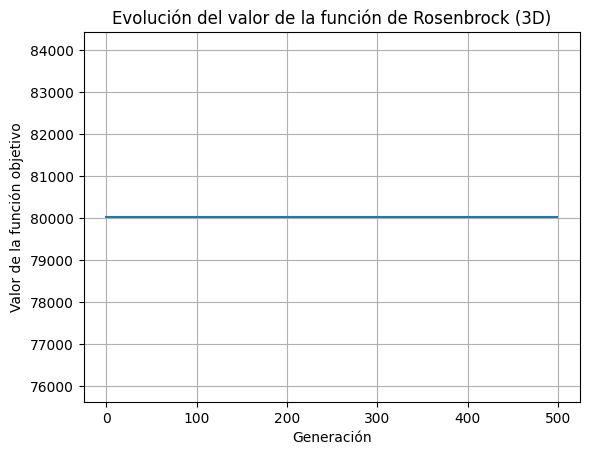

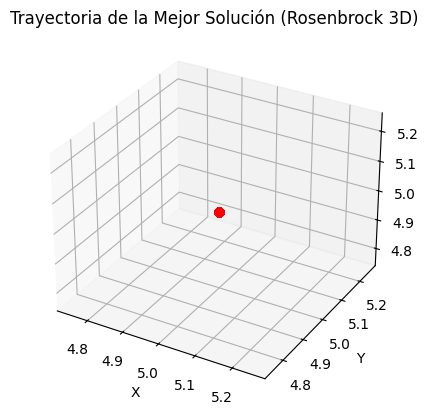

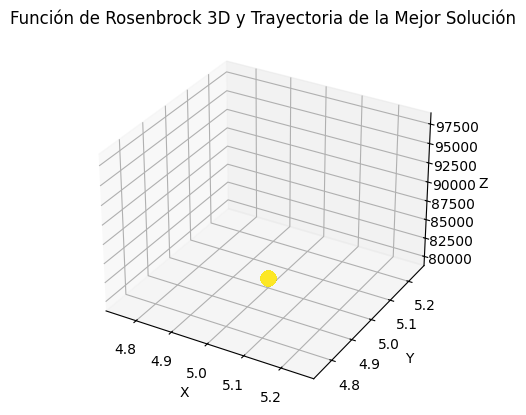

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generación de una población inicial
def pob_inicial(N, d, LB=None, UB=None):
    Pob0 = np.random.rand(N, d)
    if LB is not None:
        Pob0 = Pob0 * (UB - LB) + LB
    return Pob0

# Función de Rosenbrock en 3 dimensiones
def rosenbrock_fun(x):
    val = 0
    for i in range(len(x) - 1):
        val += 100 * (x[i + 1] - x[i]**2)**2 + (1 - x[i])**2
    return val

# Mutación de individuos
def mutacion(Pob, indices_mutantes, LB, UB):
    Pob = Pob.copy()
    n_row, n_col = Pob.shape
    for i in indices_mutantes:
        coord_mutacion = np.random.randint(low=0, high=n_col, size=1)
        Pob[i, coord_mutacion] = np.random.rand() * (UB[coord_mutacion] - LB[coord_mutacion]) + LB[coord_mutacion]
    return Pob[indices_mutantes]

# Cruzamiento de individuos
def cruzamiento(Pob):
    Pob = Pob.copy()
    n_row, n_col = Pob.shape
    n_mitad = int(np.floor(n_row / 2))

    Pob_hijos = np.zeros_like(Pob)

    for i in range(n_mitad):
        coord_cruce = np.random.randint(low=0, high=n_col, size=1)[0]
        Pob_hijos[i, :] = np.concatenate((Pob[i, :coord_cruce], Pob[n_mitad + i, coord_cruce:]))
        Pob_hijos[n_mitad + i, :] = np.concatenate((Pob[n_mitad + i, :coord_cruce], Pob[i, coord_cruce:]))
    return Pob_hijos

# Generación de la siguiente generación
def next_gen(Pob, LB, UB, fr_elitismo, fr_mutacion):
    Pob = Pob.copy()
    n_row, n_col = Pob.shape
    fr_cruzamiento = 1 - fr_mutacion - fr_elitismo

    n_mutacion = int(n_row * fr_mutacion)
    n_cruzamiento = int(2 * np.floor(n_row * fr_cruzamiento / 2))
    n_elite = n_row - n_mutacion - n_cruzamiento

    Pob_elite = Pob[:n_elite, :]
    indices_de_los_novios = np.random.choice(n_row, size=n_cruzamiento, replace=False)
    Pob_hijos = cruzamiento(Pob[indices_de_los_novios, :])
    indices_mutantes = np.random.choice(n_row, size=n_mutacion, replace=False)
    Pob_mutantes = mutacion(Pob, indices_mutantes, LB, UB)

    Pob_nueva = np.concatenate((Pob_elite, Pob_hijos, Pob_mutantes))
    return Pob_nueva

# Función de evaluación (fitness) de la población
def fitness(Pob, f_obj):
    Pob = Pob.copy()
    n_row, n_col = Pob.shape
    f_val = np.zeros(n_row)

    for i in range(n_row):
        f_val[i] = f_obj(Pob[i, :])

    ranking = np.argsort(f_val)
    return Pob[ranking, :], f_val.min()

# Algoritmo evolutivo para hallar el mínimo
def mi_algoritmo_evolutivo(f_obj, N, d, fr_elitismo, fr_mutacion, num_generaciones, LB=None, UB=None):
    Pob = []
    f_best = []
    x_best = []
    mejor_sol_trayectoria = []

    # Generación de la población inicial
    Pob0 = pob_inicial(N, d, LB, UB)

    # Ciclo evolutivo
    for i in range(num_generaciones):
        Pob_ranked, f_best_i = fitness(Pob0, f_obj)
        Pob.append(Pob_ranked)
        f_best.append(f_best_i)
        x_best.append(Pob_ranked[0, :])
        mejor_sol_trayectoria.append(Pob_ranked[0, :])  # Guardar la mejor solución en cada generación

        Pob0 = next_gen(Pob_ranked, LB, UB, fr_elitismo, fr_mutacion)
        Pob.append(Pob0)

    return x_best, f_best, Pob, mejor_sol_trayectoria

# Definición de los límites de la función de Rosenbrock
LB = 5 * np.ones(3)  # Límite inferior de -5.12 para cada dimensión
UB = 5 * np.ones(3)   # Límite superior de 5.12 para cada dimensión

# Configuración del algoritmo evolutivo
np.random.seed(1234)  # Fijamos la semilla para resultados reproducibles
N = 30                # Tamaño de la población
d = 3                 # Número de dimensiones
num_generaciones = 500  # Número de generaciones
fr_elitismo = 0.05     # Fracción de élite
fr_mutacion = 0.1      # Fracción de mutación

# Ejecución del algoritmo
mejor_sol, mejor_valor, todas_poblaciones, mejor_sol_trayectoria = mi_algoritmo_evolutivo(
    f_obj=rosenbrock_fun, N=N, d=d, fr_elitismo=fr_elitismo, fr_mutacion=fr_mutacion,
    num_generaciones=num_generaciones, LB=LB, UB=UB)

# Mostrar el valor final de la mejor solución
print("Valor final de la mejor solución:", mejor_valor[-1])
print("Mejor solución encontrada:", mejor_sol[-1])

# Graficar la evolución de la mejor solución
plt.plot(np.arange(0, num_generaciones), mejor_valor)
plt.title('Evolución del valor de la función de Rosenbrock (3D)')
plt.xlabel('Generación')
plt.ylabel('Valor de la función objetivo')
plt.grid(True)
plt.show()

# Graficar la trayectoria de la mejor solución de cada generación
mejor_sol_trayectoria = np.array(mejor_sol_trayectoria)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(mejor_sol_trayectoria[:, 0], mejor_sol_trayectoria[:, 1], mejor_sol_trayectoria[:, 2], marker='o', color='r')
ax.set_title('Trayectoria de la Mejor Solución (Rosenbrock 3D)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

# Graficar la función de Rosenbrock 3D
x = np.linspace(LB[0], UB[0], 100)
y = np.linspace(LB[1], UB[1], 100)
x, y = np.meshgrid(x, y)
z = np.array([rosenbrock_fun(np.array([xi, yi, 1])) for xi, yi in zip(np.ravel(x), np.ravel(y))])
z = z.reshape(x.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

# Graficar los puntos de la mejor solución con colores según f(x,y,z)
for sol, val in zip(mejor_sol_trayectoria, mejor_valor):
    ax.scatter(sol[0], sol[1], rosenbrock_fun(sol), color=plt.cm.viridis(val / max(mejor_valor)), s=100)

ax.set_title('Función de Rosenbrock 3D y Trayectoria de la Mejor Solución')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [ ]:
# Graficar los puntos de la mejor solución con colores según f(x,y,z)
for sol, val in zip(mejor_sol_trayectoria, mejor_valor):
    ax.scatter(sol[0], sol[1], rosenbrock_fun(sol), color=plt.cm.viridis(val / max(mejor_valor)), s=100)

ax.set_title('Función de Rosenbrock 3D y Trayectoria de la Mejor Solución')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


mejor solucion: [0.96973773 0.98237185 0.9462478 ]


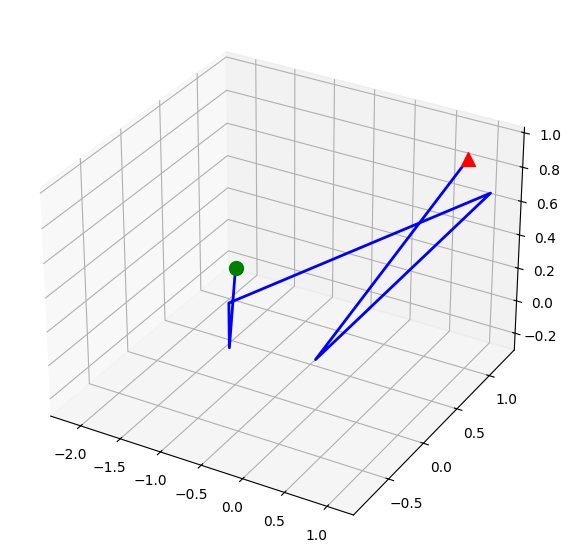

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Funciones previamente definidas
def pob_inicial(N, d, LB, UB):
    Pob0 = np.random.rand(N, d)
    return Pob0 * (UB - LB) + LB

def mutacion(Pob, indices_mutantes, LB, UB):
    Pob = Pob.copy()
    for i in indices_mutantes:
        coord_mutacion = np.random.randint(low=0, high=Pob.shape[1], size=1)
        Pob[i, coord_mutacion[0]] = np.random.rand() * (UB[coord_mutacion[0]] - LB[coord_mutacion[0]]) + LB[coord_mutacion[0]]
    return Pob

def cruzamiento(Pob):
    Pob = Pob.copy()
    n_mitad = Pob.shape[0] // 2
    Pob_hijos = np.zeros_like(Pob)
    for i in range(n_mitad):
        coord_cruce = np.random.randint(low=0, high=Pob.shape[1])
        Pob_hijos[i, :] = np.concatenate((Pob[i, :coord_cruce], Pob[n_mitad + i, coord_cruce:]))
        Pob_hijos[n_mitad + i, :] = np.concatenate((Pob[n_mitad + i, :coord_cruce], Pob[i, coord_cruce:]))
    return Pob_hijos

def next_gen(Pob, LB, UB, fr_elitismo, fr_mutacion):
    n_row = Pob.shape[0]
    n_mutacion = int(n_row * fr_mutacion)
    n_cruzamiento = 2 * (n_row - int(n_row * fr_elitismo) - n_mutacion) // 2
    n_elite = n_row - n_cruzamiento - n_mutacion

    Pob_elite = Pob[:n_elite, :]
    indices_de_los_novios = np.random.choice(n_row, size=n_cruzamiento, replace=False)
    Pob_hijos = cruzamiento(Pob[indices_de_los_novios, :])
    indices_mutantes = np.random.choice(n_row, size=n_mutacion, replace=False)
    Pob_mutantes = mutacion(Pob, indices_mutantes, LB, UB)
    return np.vstack((Pob_elite, Pob_hijos, Pob_mutantes))

def fitness(Pob, f_obj):
    f_val = np.array([f_obj(individuo) for individuo in Pob])
    ranking = np.argsort(f_val)
    return Pob[ranking, :], f_val.min()

def mi_algoritmo_evolutivo(f_obj, N, d, fr_elitismo, fr_mutacion, num_generaciones, LB, UB):
    Pob0 = pob_inicial(N, d, LB, UB)
    x_best = []
    f_best = []
    for _ in range(num_generaciones):
        Pob_ranked, f_best_i = fitness(Pob0, f_obj)
        x_best.append(Pob_ranked[0, :])
        f_best.append(f_best_i)
        Pob0 = next_gen(Pob_ranked, LB, UB, fr_elitismo, fr_mutacion)
    return x_best, f_best

def rosenbrock_fun(x):
    return sum(100 * (x[i + 1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x) - 1))

# Configuración del algoritmo
np.random.seed(1234)
d = 3  # Número de dimensiones
num_generaciones = 10
LB = -5 * np.ones(d)
UB = 5 * np.ones(d)

mejor_sol, mejor_valor = mi_algoritmo_evolutivo(
    rosenbrock_fun, N=30, d=d, fr_elitismo=0.05, fr_mutacion=0.1, num_generaciones=num_generaciones, LB=LB, UB=UB
)

# Visualización del recorrido en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Obtener los puntos de la mejor solución en cada generación
x_vals = [sol[0] for sol in mejor_sol]
y_vals = [sol[1] for sol in mejor_sol]
z_vals = [sol[2] for sol in mejor_sol]

# Graficar el recorrido de la mejor solución
ax.plot(x_vals, y_vals, z_vals, label='Recorrido de la solución', color='blue', lw=2)

# Graficar el punto inicial
ax.scatter(x_vals[0], y_vals[0], z_vals[0], color='green', s=100, label='Inicio', marker='o')

# Graficar el punto final
ax.scatter(x_vals[-1], y_vals[-1], z_vals[-1], color='red', s=100, label='Final', marker='^')


print("mejor solucion:", mejor_sol[-1])

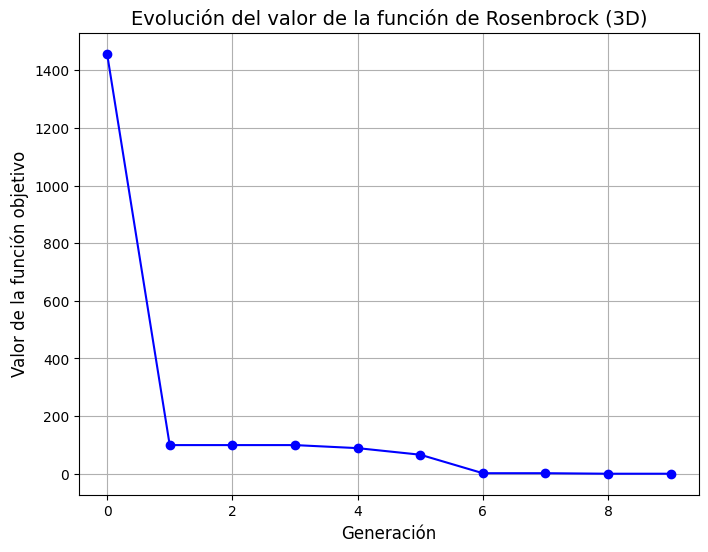

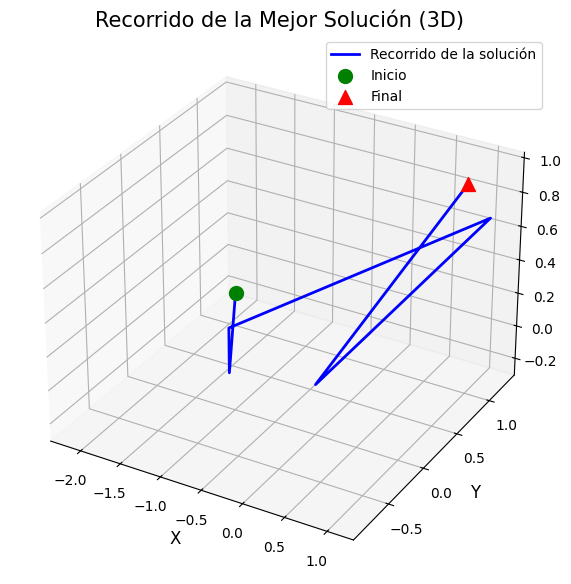

Mejor solución encontrada: [0.96973773 0.98237185 0.9462478 ]


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Funciones previamente definidas
def pob_inicial(N, d, LB, UB):
    Pob0 = np.random.rand(N, d)
    return Pob0 * (UB - LB) + LB

def mutacion(Pob, indices_mutantes, LB, UB):
    Pob = Pob.copy()
    for i in indices_mutantes:
        coord_mutacion = np.random.randint(low=0, high=Pob.shape[1], size=1)
        Pob[i, coord_mutacion[0]] = np.random.rand() * (UB[coord_mutacion[0]] - LB[coord_mutacion[0]]) + LB[coord_mutacion[0]]
    return Pob

def cruzamiento(Pob):
    Pob = Pob.copy()
    n_mitad = Pob.shape[0] // 2
    Pob_hijos = np.zeros_like(Pob)
    for i in range(n_mitad):
        coord_cruce = np.random.randint(low=0, high=Pob.shape[1])
        Pob_hijos[i, :] = np.concatenate((Pob[i, :coord_cruce], Pob[n_mitad + i, coord_cruce:]))
        Pob_hijos[n_mitad + i, :] = np.concatenate((Pob[n_mitad + i, :coord_cruce], Pob[i, coord_cruce:]))
    return Pob_hijos

def next_gen(Pob, LB, UB, fr_elitismo, fr_mutacion):
    n_row = Pob.shape[0]
    n_mutacion = int(n_row * fr_mutacion)
    n_cruzamiento = 2 * (n_row - int(n_row * fr_elitismo) - n_mutacion) // 2
    n_elite = n_row - n_cruzamiento - n_mutacion

    Pob_elite = Pob[:n_elite, :]
    indices_de_los_novios = np.random.choice(n_row, size=n_cruzamiento, replace=False)
    Pob_hijos = cruzamiento(Pob[indices_de_los_novios, :])
    indices_mutantes = np.random.choice(n_row, size=n_mutacion, replace=False)
    Pob_mutantes = mutacion(Pob, indices_mutantes, LB, UB)
    return np.vstack((Pob_elite, Pob_hijos, Pob_mutantes))

def fitness(Pob, f_obj):
    f_val = np.array([f_obj(individuo) for individuo in Pob])
    ranking = np.argsort(f_val)
    return Pob[ranking, :], f_val.min()

def mi_algoritmo_evolutivo(f_obj, N, d, fr_elitismo, fr_mutacion, num_generaciones, LB, UB):
    Pob0 = pob_inicial(N, d, LB, UB)
    x_best = []
    f_best = []
    for _ in range(num_generaciones):
        Pob_ranked, f_best_i = fitness(Pob0, f_obj)
        x_best.append(Pob_ranked[0, :])
        f_best.append(f_best_i)
        Pob0 = next_gen(Pob_ranked, LB, UB, fr_elitismo, fr_mutacion)
    return x_best, f_best

def rosenbrock_fun(x):
    return sum(100 * (x[i + 1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x) - 1))

# Configuración del algoritmo
np.random.seed(1234)
d = 3  # Número de dimensiones
num_generaciones = 10
LB = -5 * np.ones(d)
UB = 5 * np.ones(d)

mejor_sol, mejor_valor = mi_algoritmo_evolutivo(
    rosenbrock_fun, N=30, d=d, fr_elitismo=0.05, fr_mutacion=0.1, num_generaciones=num_generaciones, LB=LB, UB=UB
)

# Gráfica de la evolución de la función objetivo
plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, num_generaciones), mejor_valor, marker='o', color='blue')
plt.title('Evolución del valor de la función de Rosenbrock (3D)', fontsize=14)
plt.xlabel('Generación', fontsize=12)
plt.ylabel('Valor de la función objetivo', fontsize=12)
plt.grid(True)
plt.show()

# Visualización del recorrido en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Obtener los puntos de la mejor solución en cada generación
x_vals = [sol[0] for sol in mejor_sol]
y_vals = [sol[1] for sol in mejor_sol]
z_vals = [sol[2] for sol in mejor_sol]

# Graficar el recorrido de la mejor solución
ax.plot(x_vals, y_vals, z_vals, label='Recorrido de la solución', color='blue', lw=2)

# Graficar el punto inicial
ax.scatter(x_vals[0], y_vals[0], z_vals[0], color='green', s=100, label='Inicio', marker='o')

# Graficar el punto final
ax.scatter(x_vals[-1], y_vals[-1], z_vals[-1], color='red', s=100, label='Final', marker='^')

# Configuración de la gráfica
ax.set_title('Recorrido de la Mejor Solución (3D)', fontsize=15)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.legend()
plt.show()

print("Mejor solución encontrada:", mejor_sol[-1])



